# Please run this notebook in Jupyter Notebook

## Setup environment

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,153 kB/s)
debconf: unable to initi

## Clone git rep to get the images

In [2]:
!git clone https://github.com/shoaib6174/Cramstack-Task.git
%cd Cramstack-Task/1

Cloning into 'Cramstack-Task'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 16 (delta 1), reused 16 (delta 1), pack-reused 0
Unpacking objects: 100% (16/16), done.
/content/Cramstack-Task/1


In [3]:
import os
import re
import cv2
import pytesseract
from pytesseract import Output
from google.colab.patches import cv2_imshow

## Define function to extract dates from s image and draw box around the dats

In [4]:
def extract_date_from_image(image, img_id):
  d = pytesseract.image_to_data(image, output_type=Output.DICT)
  keys = list(d.keys())
  date_pattern = '^\d{1,2}/\d{1,2}/\d{2,4}$'
  n_boxes = len(d['text'])
  data = {
                "id" : img_id,
                'date': []
            }
  for i in range(n_boxes):
      if int(d['conf'][i]) > 10:
        if re.match(date_pattern, d['text'][i]):
            data['date'].append(d['text'][i])

            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            image = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            

  return image, data


## Get path of all the images from directory. If you wish to use other directory change the path name.

In [5]:
# specify the img directory path
path = "images/"

# list files in img directory
files = os.listdir(path)
image_paths = []
for file in files:
    # make sure file is an image
    if file.endswith(('.jpg', '.png', 'jpeg')):
        img_path = path + file
        image_paths.append(img_path)
        

## Call the extract_date_from_image function to extract data from each images

In [6]:
anoted_images = {}
date_data = []

for img_path in image_paths:
  print(img_path)
  img = cv2.imread(img_path)
  img_name = img_path.split('/')[-1]
  anoted_image , data = extract_date_from_image(img, img_name)
  if data['date']:
    anoted_images[img_name] = anoted_image
    date_data.append(data)

images/0002.png
images/0001.png


## Print date information for each of the images.

In [7]:
print(date_data)

[{'id': '0002.png', 'date': ['26/02/2019']}, {'id': '0001.png', 'date': ['12/12/12']}]


## Print images with date in box

0002.png


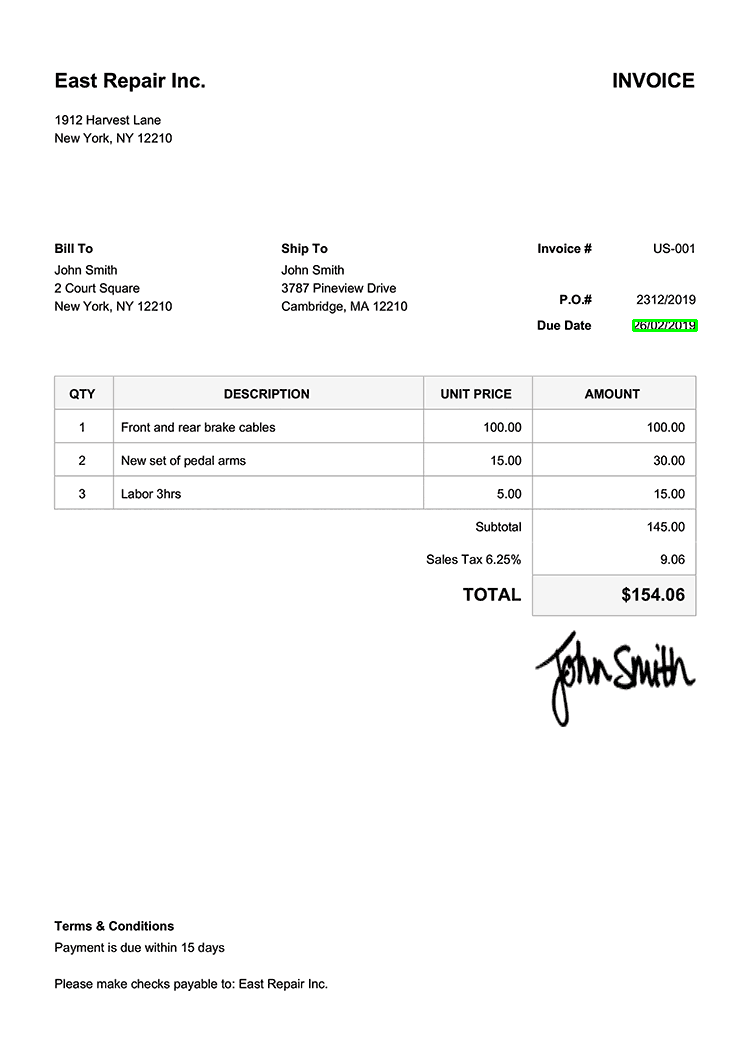

----------------


0001.png


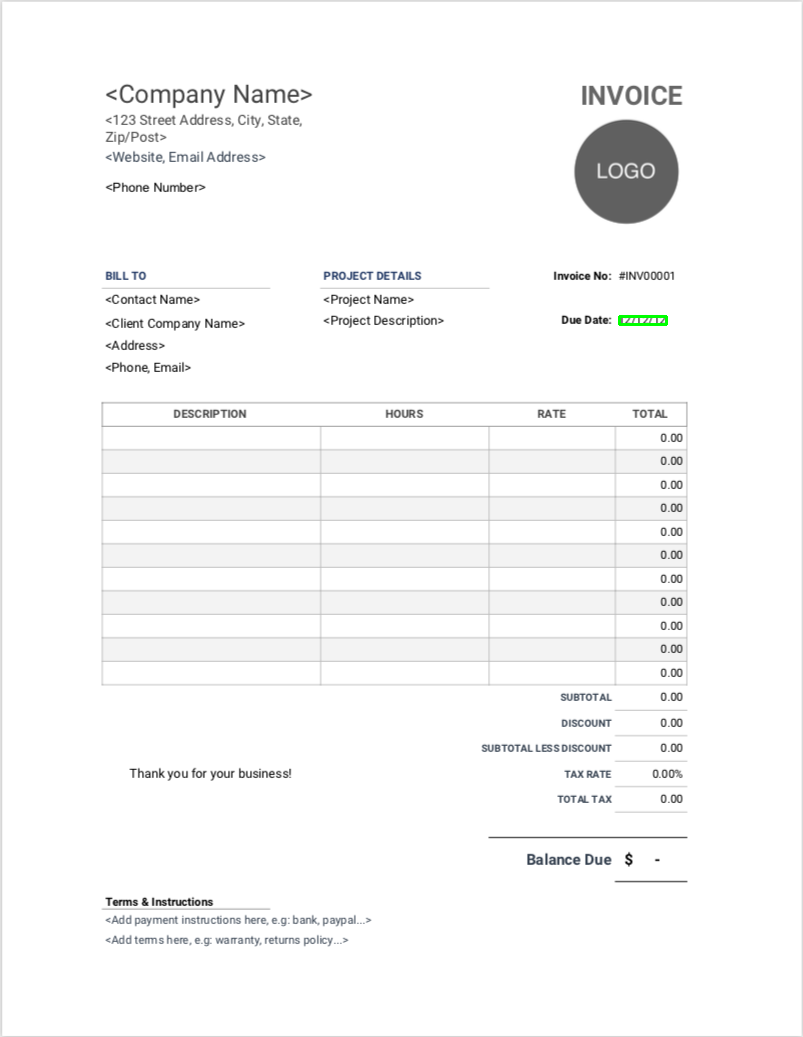

----------------




In [8]:
for image_id in anoted_images:
  print(image_id)
  cv2_imshow(anoted_images[image_id])
  print('----------------\n\n')